## Setup
Run following code to setup dataset loading. You need to execute **initialize.sh** before running this notebook.

Use the follow sequence of commands to setup a proper environment:

```
git clone https://github.com/NirooshKa/APS360-Cold-Start-Problem.git
cd APS360-Cold-Start-Problem
./initialize.sh
pip install torch==1.8.0+cpu torchvision==0.9.0+cpu torchaudio===0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
pip install jupyterlab
pip install matplotlib
jupyter-lab
```

In [1]:
# Import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
available_names = ["cats", "cats_and_dogs", "flowers", "horses"] # Available dataset types
split_ratios = [0.8, 0.1, 0.1] # Sum must equals 1

def get_data_loader_type(name, batch_size=4, num_workers=1, transformer=None):
    """Get a set of dataloaders for a particular type
    Available types are:
    - cats
    - cats_and_dogs
    - flowers
    - horses
    """
    # Input Validation
    if name not in available_names:
        print(f"Input name is not available: {name}.")
        return
    
    # Load all data labeled with folder name
    if transformer == None:
        dataset = datasets.ImageFolder(root=name,
                transform=transforms.ToTensor())
    else:
        dataset = datasets.ImageFolder(root=name,
                transform=transformer)
    # Prepare splitting
    indices = [idx for idx in range(len(dataset))] # To apply additional filtering: if list(dataset[idx][0].shape) == [3, 224, 224]
    # Randomize set
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(indices)
    # Get splits
    split1 = int(len(indices) * split_ratios[0])
    split2 = int(len(indices) * (split_ratios[0] + split_ratios[1]))
    # Split into training, validation and test
    train_indices, val_indices, test_indices = indices[:split1], indices[split1:split2], indices[split2:]
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)
    test_sampler = SubsetRandomSampler(test_indices)
    # Create corresponding loaders
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers, 
                                               sampler=train_sampler, shuffle=False)
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers,
                                             sampler=val_sampler, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,num_workers=num_workers, 
                                              sampler=test_sampler, shuffle=False)
    # Return
    return train_loader, val_loader, test_loader, dataset.classes

def get_data_loader_total():
    """Get a single (set of) dataloaders with mixed data 
    """

In [7]:
horse_IDs = { 0: "Akhal-Teke", 1: "Appaloosa", 2: "Orlov Trotter", 3: "Vladimir Heavy Draft", 4: "Percheron", 5: "Arabian", 6: "Friesian"}

def showImages(data_loader, count = 15):
    k = 0
    plt.figure(figsize=(36,36))
    
    ret_labels = []
    
    for images, labels in data_loader:
        # since batch_size = 1, there is only 1 image in `images`
        image = images[0]
        # place the colour channel at the end, instead of at the beginning
        img = np.transpose(image, [1,2,0])
        # Plot
        p = plt.subplot(3, 5, k+1)
        #p.set_title(horse_IDs[labels[0].item()])
        plt.axis('off')
        plt.imshow(img, interpolation='nearest')
        ret_labels.append(horse_IDs[labels[0].item()])

        k += 1
        if k > count - 1:
            break
            
    return ret_labels

## Preview Data

Use below snippets to help preview data.

In [8]:
# Configurations
if __name__ == "__main__":
    train_loader, val_loader, test_loader, classes = get_data_loader_type('horses', batch_size=1)

Train Loader:
Available classes: ['Akhal-Teke', 'Appaloosa', 'Arabian', 'Friesian', 'Orlov Trotter', 'Percheron', 'Vladimir Heavy Draft']


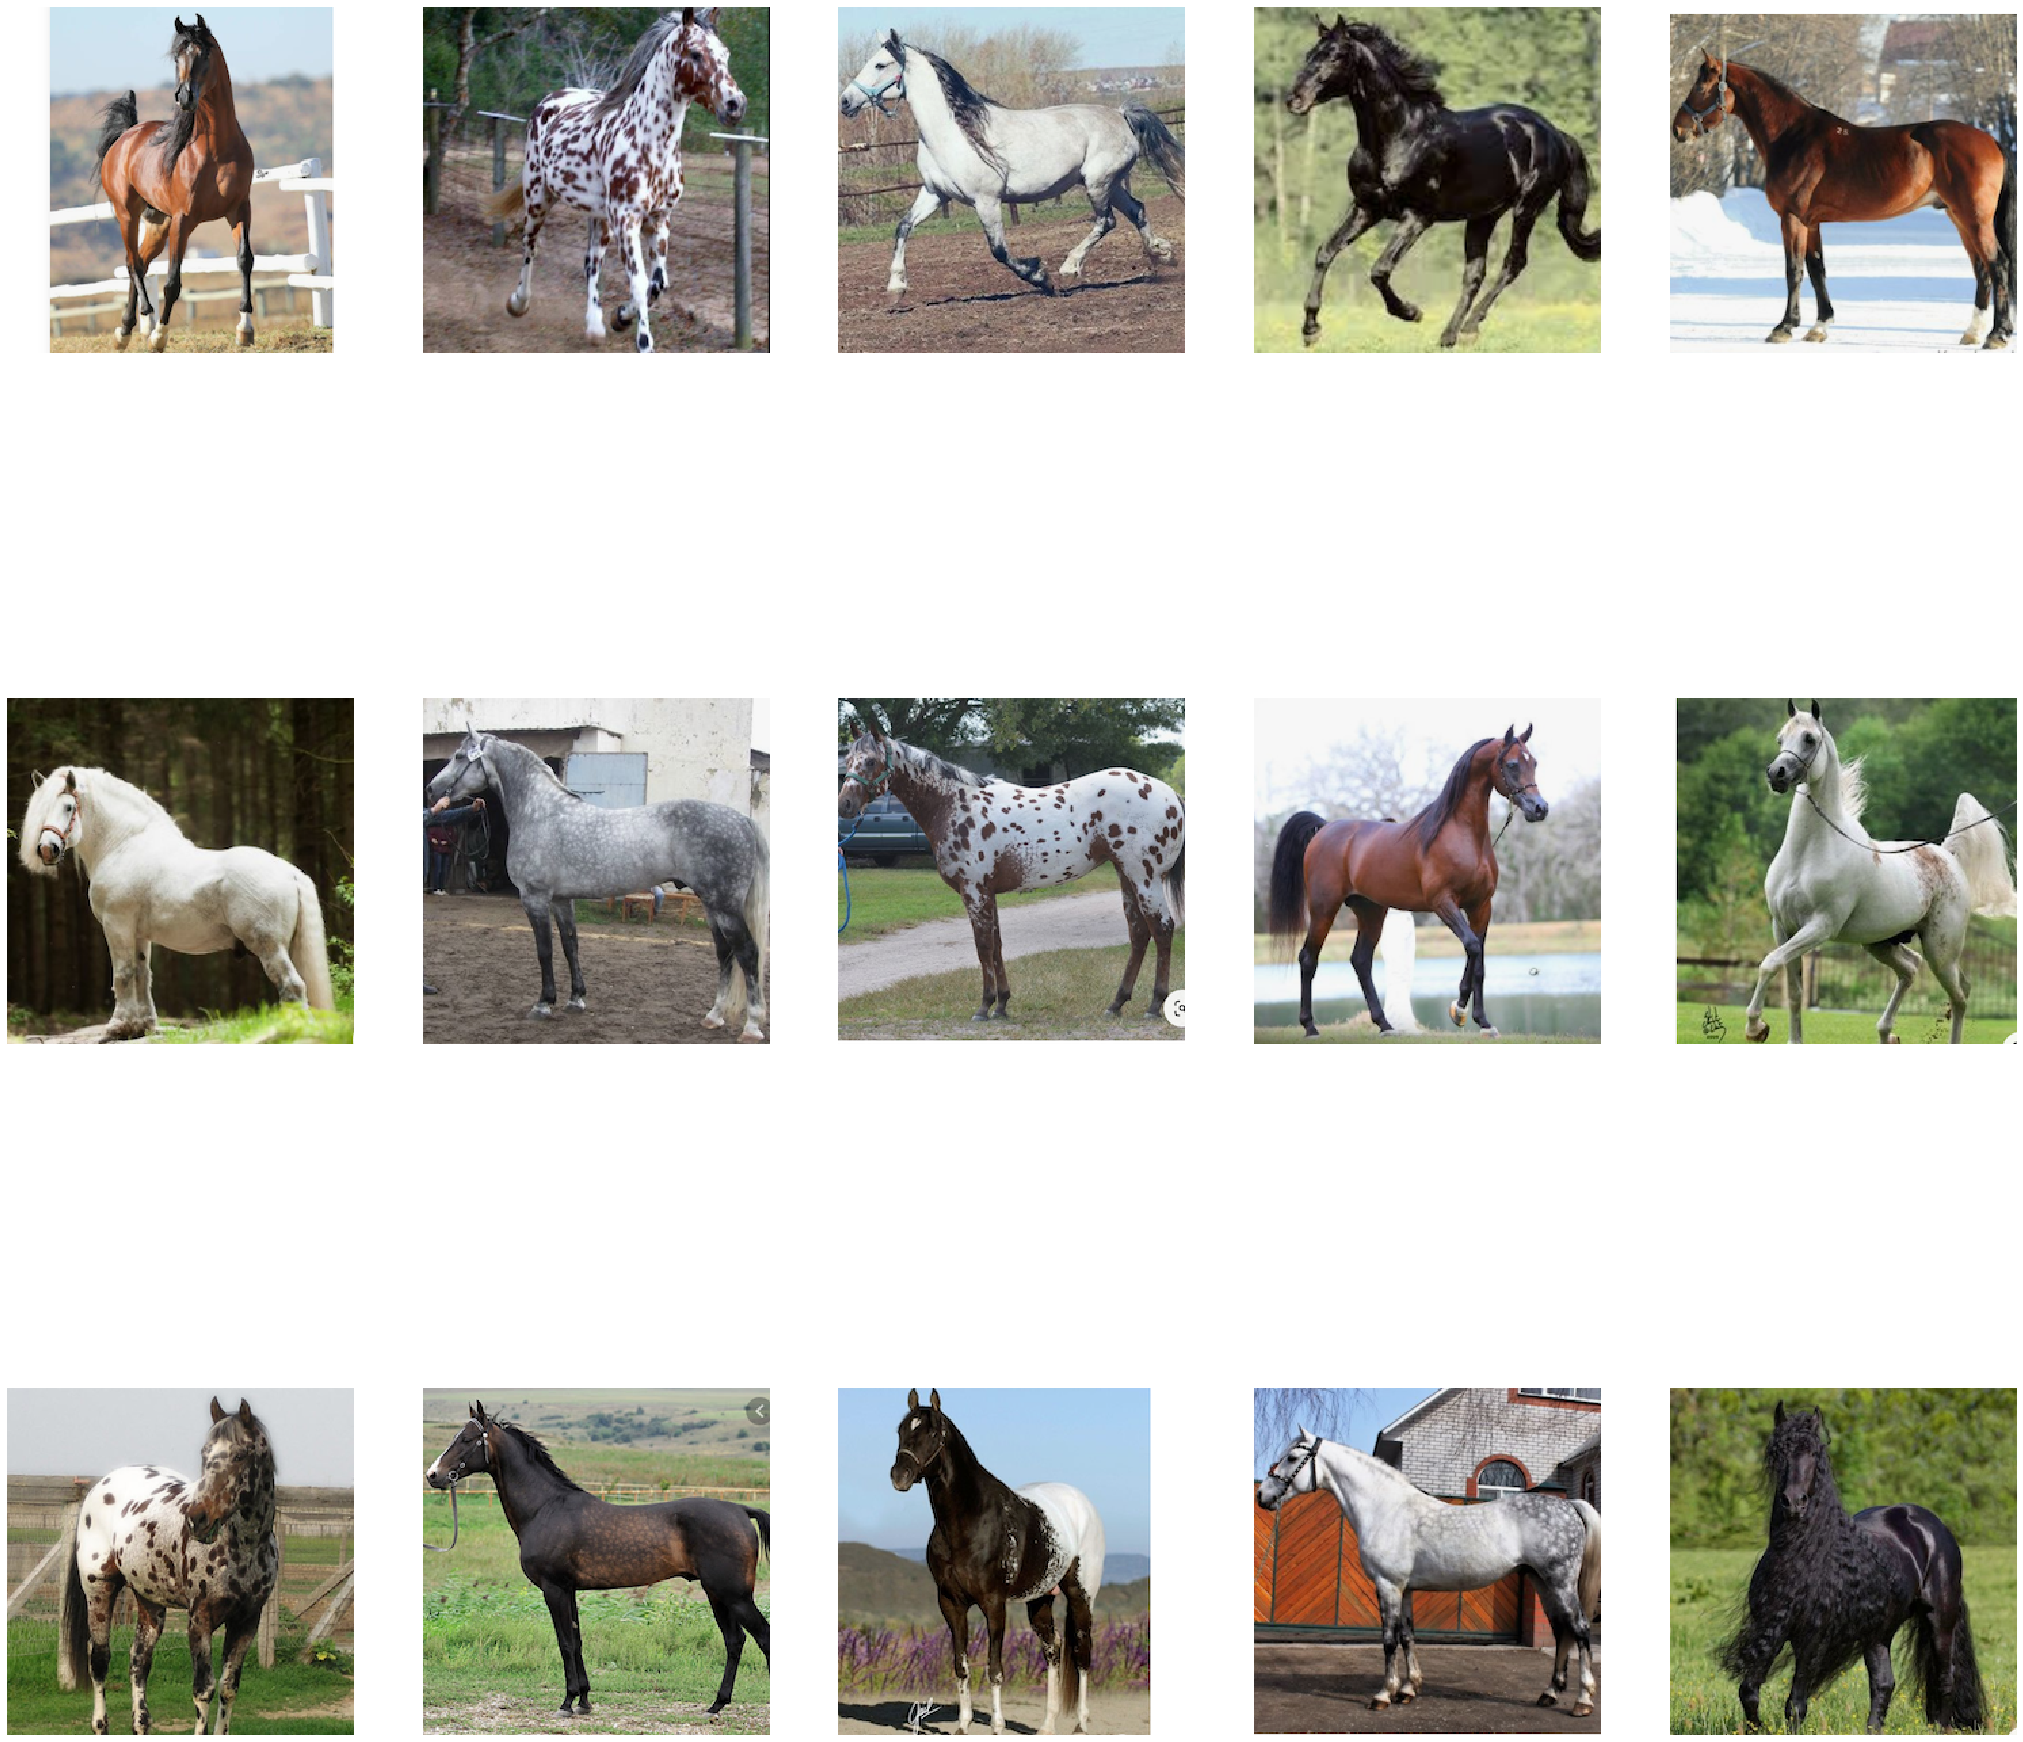

In [12]:
if __name__ == "__main__":
    print("Train Loader:")
    showImages(train_loader)
    print(f'Available classes: {classes}')

In [13]:
print(labels)

['Orlov Trotter', 'Appaloosa', 'Percheron', 'Percheron', 'Percheron', 'Arabian', 'Percheron', 'Appaloosa', 'Orlov Trotter', 'Orlov Trotter', 'Appaloosa', 'Akhal-Teke', 'Appaloosa', 'Percheron', 'Vladimir Heavy Draft']
